In [11]:
import json
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("/Users/karinabalagazova/Desktop/cvut/5.semestr/scientificProject/notebooks/..")
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('Solarize_Light2')
plt.style.use('seaborn-darkgrid')
from functions.saving_data import get_empty_auc_dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Load files with AUC scores
data_original = np.load('auc_results_origin_poisson.npz', allow_pickle=True)
data_original = data_original['auc_data'].item()

data_expected = np.load('auc_results_expected_poisson.npz', allow_pickle=True)
data_expected = data_expected['auc_data'].item()

data_compensated = np.load('auc_results_filtered_poisson.npz', allow_pickle=True)
data_compensated = data_compensated['auc_data'].item()

In [16]:
# Get AUC scores of data with no class effect and strong IS effect
original = data_original[10000]['IS_strong']['class_no']['auc']
expected = data_expected[10000]['IS_strong']['class_no']['auc']
compensated = data_compensated[10000]['IS_strong']['class_no']['auc']

Class effect: no. IS effect: 2 transcripts, effect = range(0.5, 1)


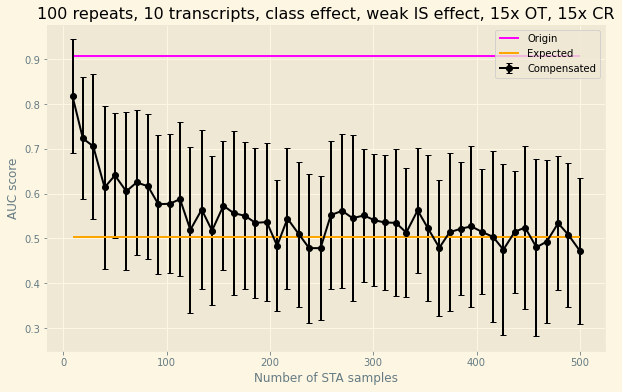

In [17]:
STA_range = data_original[10]['IS_strong']['class_no']['STA_range']
indexes = range(len(STA_range))
print(data_original[10]['IS_strong']['class_no']['description'])
plt.figure(figsize=(10,6))
plt.hlines(np.nanmean(original[indexes]), STA_range[0], STA_range[-1], colors=['magenta'], label='Origin')
plt.errorbar(STA_range, np.nanmean(compensated[indexes], axis=0), np.nanstd(compensated[indexes], axis=0), ecolor= 'black', fmt='-ok', capsize=3, label='Compensated')
plt.hlines(np.nanmean(expected[indexes]), STA_range[0], STA_range[-1], colors=['orange'], label='Expected') #orange

plt.legend()
plt.title('100 repeats, 10 transcripts, class effect, weak IS effect, 15x OT, 15x CR')
plt.xlabel('Number of STA samples')
plt.ylabel('AUC score')
plt.show()

In [12]:
# Load files with AUC scores
# data_original = np.load(f + 'auc_results_origin_neg-binomial.npz', allow_pickle=True)
# data_original = data_original['auc_data'].item()
#
# data_expected = np.load(f + 'auc_results_expected_neg-binomial.npz', allow_pickle=True)
# data_expected = data_expected['auc_data'].item()
#
# data_compensated = np.load(f + 'auc_results_filtered_neg-binomial.npz', allow_pickle=True)
# data_compensated = data_compensated['auc_data'].item()
# f = "DATA-100-POISSON/"
# f = "Archive_copy/"
f = ""
data_original = np.load(f + 'auc_results_origin_neg-binomial.npz', allow_pickle=True)
data_original = data_original['auc_data'].item()

data_expected = np.load(f + 'auc_results_expected_neg-binomial.npz', allow_pickle=True)
data_expected = data_expected['auc_data'].item()

data_compensated = np.load(f + 'auc_results_filtered_neg-binomial.npz', allow_pickle=True)
data_compensated = data_compensated['auc_data'].item()

f = "negative/"
data_original1 = np.load(f + 'auc_results_origin_neg-binomial.npz', allow_pickle=True)
data_original1 = data_original1['auc_data'].item()

data_expected1 = np.load(f + 'auc_results_expected_neg-binomial.npz', allow_pickle=True)
data_expected1 = data_expected1['auc_data'].item()

data_compensated1 = np.load(f + 'auc_results_filtered_neg-binomial.npz', allow_pickle=True)
data_compensated1 = data_compensated1['auc_data'].item()

In [77]:
dataset = np.load('10000_5_0.5_0_neg-binomial-STA-20-repeat-0-20210809-001254.npz', allow_pickle=True)
dataset = dataset['datasets'].item()

In [45]:
t = 10000 # number of transcripts
n_IS = 20 # number of effected by IS transcripts
i = 0.9 # effect of IS [0.5, 0.9]
n_class = 10 # number of effected by class transcripts [0,
c = 0.4 # effect of class (mean value) [0.3, 0.4]

# Get AUC scores of data with no class effect and strong IS effect
original = data_original[t][n_IS][i][n_class][c]['auc']
expected = data_expected[t][n_IS][i][n_class][c]['auc']
filtered = data_compensated[t][n_IS][i][n_class][c]['auc']

[]


<ipython-input-46-597580ae2621>:12: RuntimeWarning: Mean of empty slice
  ax.hlines(np.nanmean(original[indexes]), STA_range[0],  STA_range[-1], colors=['magenta'], label='Origin')


IndexError: list index out of range

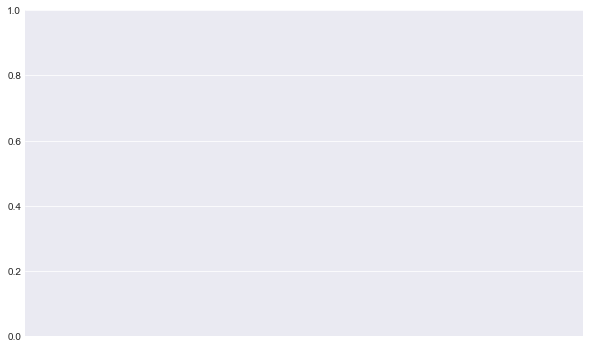

In [46]:
n_repeats = 10
STA_range = data_original[t][n_IS][i][n_class][c]['STA_range']
print(STA_range)
indexes = range(len(STA_range))
fig,ax = plt.subplots()
ax.set_xscale('log')
ax.set_xticks(STA_range)
ax.set_xticklabels(STA_range)

fig.set_size_inches(10, 6)

ax.hlines(np.nanmean(original[indexes]), STA_range[0],  STA_range[-1], colors=['magenta'], label='Origin')
ax.fill_between(STA_range, np.nanmean(original[indexes]) - np.nanstd(original[indexes])/np.sqrt(n_repeats), np.nanmean(original[indexes]) + np.nanstd(original[indexes])/np.sqrt(n_repeats),facecolor='pink', alpha= 0.5)

ax.errorbar(STA_range, np.nanmean(filtered[indexes], axis=0), np.nanstd(filtered[indexes], axis=0)/np.sqrt(n_repeats), ecolor= 'black', fmt='-ok', capsize=3, elinewidth=3, markeredgewidth=2, label='Compensated') #green

ax.hlines(np.nanmean(expected[indexes]),  STA_range[0],  STA_range[-1], colors=['orange'], label='Expected') #orange
ax.fill_between(STA_range, np.nanmean(expected[indexes]) - np.nanstd(expected[indexes])/np.sqrt(n_repeats), np.nanmean(expected[indexes]) + np.nanstd(expected[indexes])/np.sqrt(n_repeats),facecolor='orange', alpha= 0.3)

plt.legend()

if n_class == 0:
    plt.title("10 repeats, {t} transcripts, no class effect, IS effect({n_IS}, {i}), 15x OT, 15x CR".format(t=t, n_IS=n_IS, i=i))
else:
    plt.title("10 repeats, {t} transcripts, class effect({n_class}, {c}), IS effect({n_IS}, {i}), 15x OT, 15x CR".format(t=t, n_class=n_class, c=c, n_IS=n_IS, i=i))
plt.xlabel('Number of STA samples')
plt.ylabel('AUC score')
plt.savefig("12.08._POISSON_10x{t}_class_{n_class}_{c}_0.1_IS_{n_IS}_{i}.png".format(t=t, n_class=n_class, c=c, n_IS=n_IS, i=i))
plt.show()

new IS_effect_n_transcripts:  5
new IS_effect:  0.3
0
0
0
0
0
0
0
0
0
0
new IS_effect:  0.5
90
0
0
0
0
90
90
0
90
90
new IS_effect:  0.9
90
0
0
0
0
90
90
0
90
90


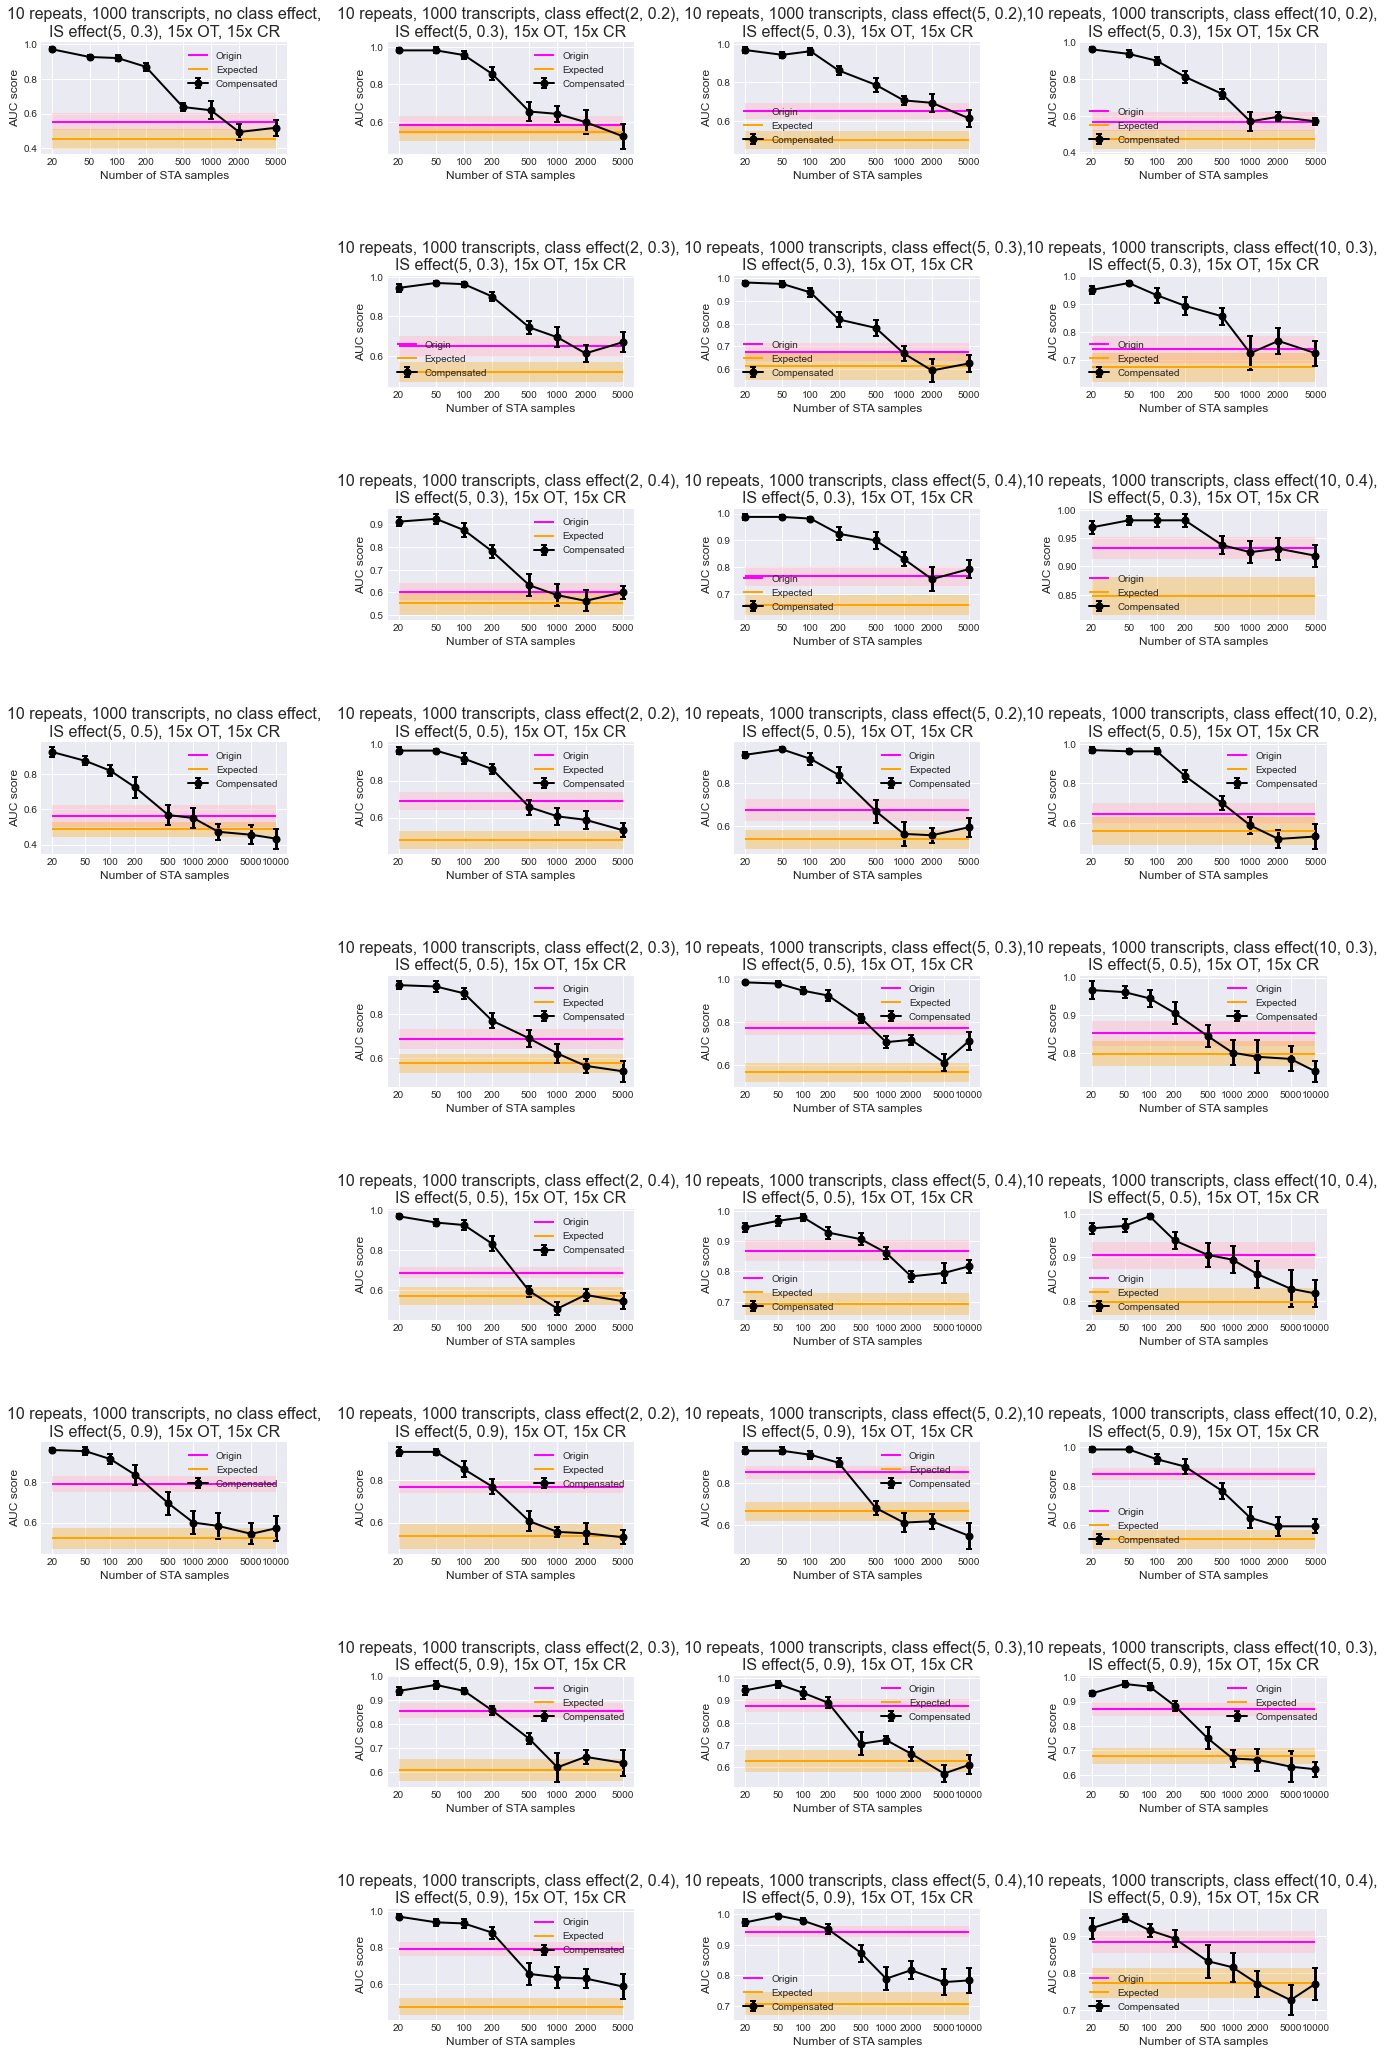

In [188]:
transcripts = [1000]
class_effect_n_transcripts = [0, 2, 5, 10]
class_effect = [0.2, 0.3, 0.4]  # mean of normal distribution

IS_effect_n_transcripts = [5] #[5, 10] # konst
IS_effect = [0.3, 0.5, 0.9]  # coefficients beta1..beta3
count_ind = 0

fig = plt.figure(figsize=(20,30))

for t in transcripts:
    for n_IS in IS_effect_n_transcripts:
        count_ind = 0
        print('new IS_effect_n_transcripts: ', n_IS)
        for i in IS_effect:

            print('new IS_effect: ', i)
            for c_cur in class_effect:
                for ind, n_class in enumerate(class_effect_n_transcripts):
                    if n_class == 0 and c_cur != class_effect[0]:
                        continue

                    c = 0.2 if n_class == 0 else c_cur
                    colspan = 2 if n_class == 0 else 1

                    ax = plt.subplot2grid((len(IS_effect)*len(class_effect),len(class_effect_n_transcripts)), (count_ind, ind))
                    if n_class == class_effect_n_transcripts[-1]:
                        count_ind += 1

                    n_repeats = 10
                    original = data_original[t][n_IS][i][n_class][c]['auc']
                    expected = data_expected[t][n_IS][i][n_class][c]['auc']
                    filtered = data_compensated[t][n_IS][i][n_class][c]['auc']
                    STA_range = data_original[t][n_IS][i][n_class][c]['STA_range']

                    if original.size == 0:
                        original = data_original1[t][n_IS][i][n_class][c]['auc']
                        expected = data_expected1[t][n_IS][i][n_class][c]['auc']
                        filtered = data_compensated1[t][n_IS][i][n_class][c]['auc']
                        STA_range = data_original1[t][n_IS][i][n_class][c]['STA_range']

                    indexes = range(len(STA_range))
                    ax.set_xscale('log')
                    ax.set_xticks(STA_range)
                    ax.set_xticklabels(STA_range)

                    ax.hlines(np.nanmean(original[indexes]), STA_range[0],  STA_range[-1], colors=['magenta'], label='Origin')
                    ax.fill_between(STA_range, np.nanmean(original[indexes]) - np.nanstd(original[indexes])/np.sqrt(n_repeats), np.nanmean(original[indexes]) + np.nanstd(original[indexes])/np.sqrt(n_repeats),facecolor='pink', alpha= 0.5)

                    ax.errorbar(STA_range, np.nanmean(filtered[indexes], axis=0), np.nanstd(filtered[indexes], axis=0)/np.sqrt(n_repeats), ecolor= 'black', fmt='-ok', capsize=3, elinewidth=3, markeredgewidth=2, label='Compensated') #green

                    ax.hlines(np.nanmean(expected[indexes]),  STA_range[0],  STA_range[-1], colors=['orange'], label='Expected') #orange
                    ax.fill_between(STA_range, np.nanmean(expected[indexes]) - np.nanstd(expected[indexes])/np.sqrt(n_repeats), np.nanmean(expected[indexes]) + np.nanstd(expected[indexes])/np.sqrt(n_repeats),facecolor='orange', alpha= 0.3)

                    plt.legend()

                    if n_class == 0:
                        plt.title("10 repeats, {t} transcripts, no class effect,\nIS effect({n_IS}, {i}), 15x OT, 15x CR".format(t=t, n_IS=n_IS, i=i))
                    else:
                        plt.title("10 repeats, {t} transcripts, class effect({n_class}, {c}), \nIS effect({n_IS}, {i}), 15x OT, 15x CR".format(t=t, n_class=n_class, c=c, n_IS=n_IS, i=i))
                    plt.xlabel('Number of STA samples')
                    plt.ylabel('AUC score')
                    # plt.savefig("12.08._POISSON_10x{t}_class_{n_class}_{c}_0.1_IS_{n_IS}_{i}.png".format(t=t, n_class=n_class, c=c, n_IS=n_IS, i=i))
                    # plt.show()

fig.tight_layout(pad=6)
fig.savefig("1000NB_IS_5.png")

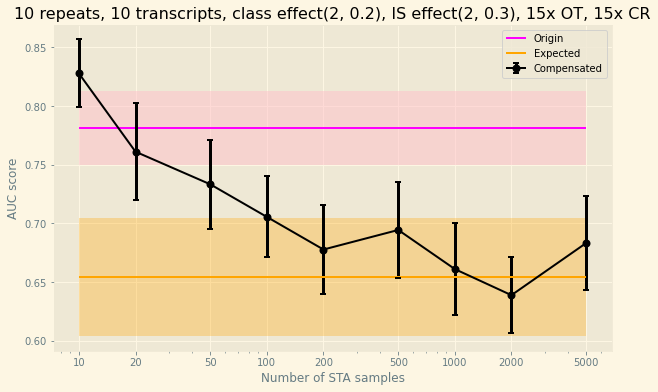

In [6]:
# 10k nb vetsi vliv tridy
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25,30))
plots = []
for i in range(4): #
    for j in range(4):
        ax = plt.subplot2grid((5,4), (i,j))
        ax.set_xscale('log')
        ax.set_xticks(STA_range)
        ax.set_xticklabels(STA_range)

        ax.hlines(np.nanmean(original[indexes]), STA_range[0],  STA_range[-1], colors=['magenta'], label='Origin')
        ax.fill_between(STA_range, np.nanmean(original[indexes]) - np.nanstd(original[indexes])/np.sqrt(n_repeats), np.nanmean(original[indexes]) + np.nanstd(original[indexes])/np.sqrt(n_repeats),facecolor='pink', alpha= 0.5)

        ax.errorbar(STA_range, np.nanmean(filtered[indexes], axis=0), np.nanstd(filtered[indexes], axis=0)/np.sqrt(n_repeats), ecolor= 'black', fmt='-ok', capsize=3, elinewidth=3, markeredgewidth=2, label='Compensated') #green

        ax.hlines(np.nanmean(expected[indexes]),  STA_range[0],  STA_range[-1], colors=['orange'], label='Expected') #orange
        ax.fill_between(STA_range, np.nanmean(expected[indexes]) - np.nanstd(expected[indexes])/np.sqrt(n_repeats), np.nanmean(expected[indexes]) + np.nanstd(expected[indexes])/np.sqrt(n_repeats),facecolor='orange', alpha= 0.3)

        if n_class == 0:
            plt.title("10 repeats, {t} transcripts, no class effect, IS effect({n_IS}, {i}), 15x OT, 15x CR".format(t=t, n_IS=n_IS, i=i))
        else:
            plt.title("10 repeats, {t} transcripts, class effect({n_class}, {c}), IS effect({n_IS}, {i}), 15x OT, 15x CR".format(t=t, n_class=n_class, c=c, n_IS=n_IS, i=i))
        plt.xlabel('Number of STA samples')
        plt.ylabel('AUC score')
plt.show()
